In [1]:
from datasets import load_dataset, Dataset, DatasetDict

In [3]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Appliances", split="full")
print(f"Number of Appliances: {len(dataset):,}")

Number of Appliances: 94,327


Number of Appliances: 94,327


In [97]:
print(type(dataset[0]))
print(dataset[0].keys())
print()
datapoint = dataset[0]
price = datapoint['price']
if price:
    print("if price")
print(price)
price = float(price) if price not in ('None', '') else 0
# for key in dataset[0].keys():
#     print(f"{key.title()}: {dataset[0][key]}\n")

<class 'dict'>
dict_keys(['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'])

if price
None


In [98]:
prices = []
num_characters = []

for datapoint in dataset:
    try:
        price = float(datapoint['price'])
        if price > 0:
            prices.append(price)
            contents = datapoint['title'] + str(datapoint['description']) + str(datapoint['features']) + str(datapoint['details'])
            num_characters.append(len(contents))
        
    except ValueError as e:
        pass

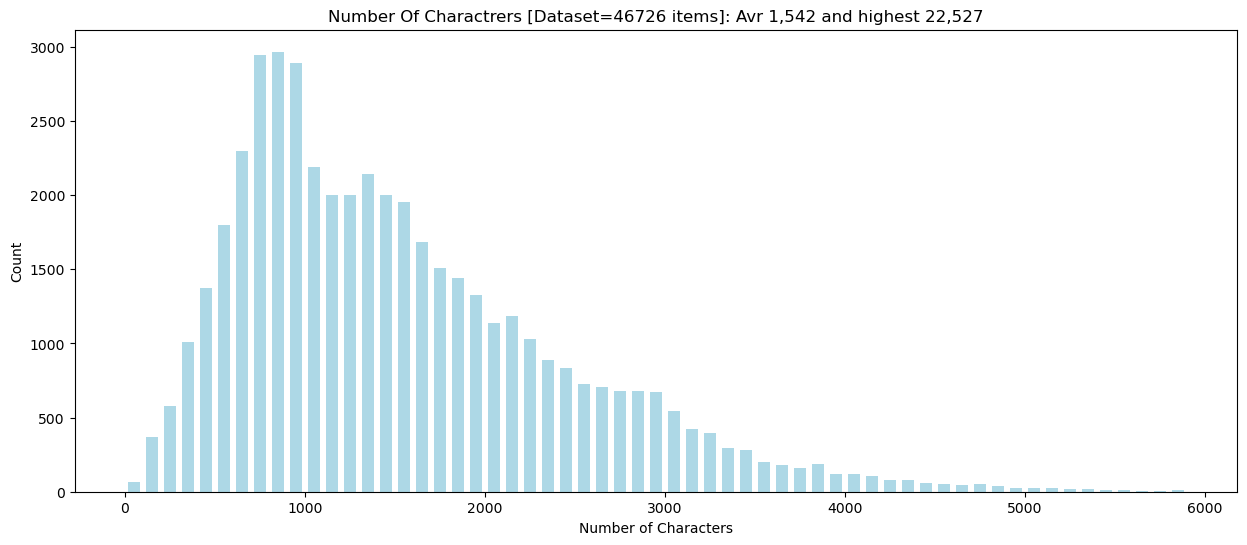

In [122]:
plt.figure(figsize=(15, 6))
plt.title((f"Number Of Charactrers [Dataset={len(num_characters)} items]: Avr {sum(num_characters)/len(num_characters):,.0f} "
    f"and highest {max(num_characters):,}"))
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.hist(num_characters, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.show()

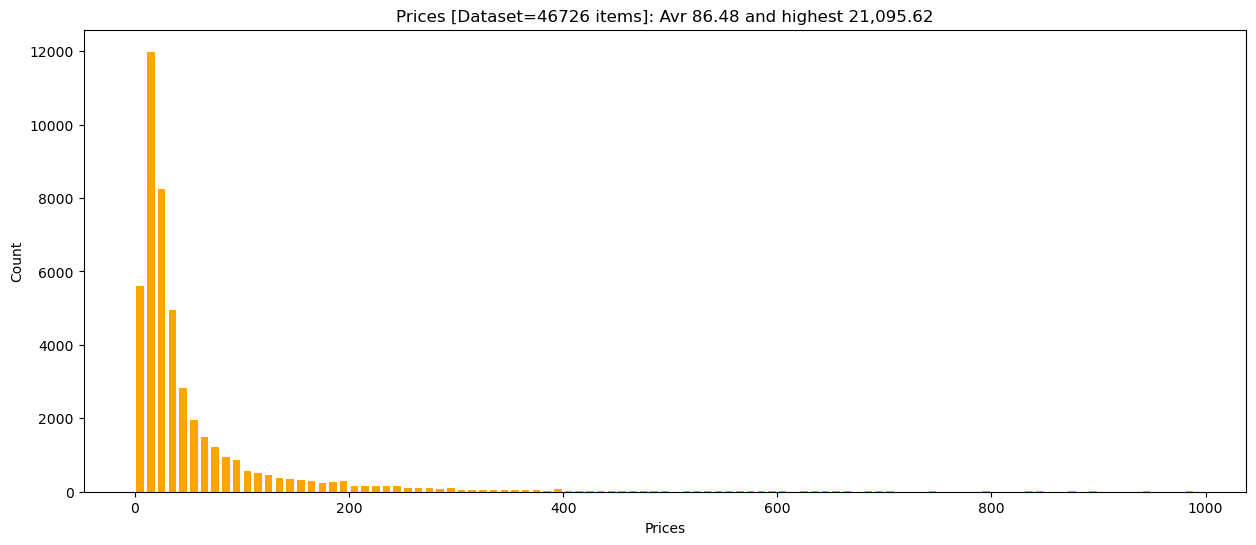

In [123]:
plt.figure(figsize=(15, 6))
plt.title((f"Prices [Dataset={len(prices)} items]: Avr {sum(prices)/len(prices):,.2f} "
          f"and highest {max(prices):,}")) 
plt.xlabel('Prices')
plt.ylabel('Count')
plt.hist(prices, rwidth=0.7, color='orange', bins=range(0, 1000, 10))
plt.show()

In [4]:
len(dataset)

94327

In [7]:
import matplotlib.pyplot as plt
import importlib
import myitems

from myitems import Item

%matplotlib inline

importlib.reload(myitems)

item = Item(dataset[0], 10.0)
print(item)
print("\nPrompt:")
print(item.prompt)

2025-09-16 19:15:46.473105: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Title: ROVSUN Ice Maker Machine Countertop, Make 44lbs Ice in 24 Hours, Compact & Portable Ice Maker with Ice Basket for Home, Office, Kitchen, Bar (Silver)
Price: 10.00
Include: True 177 tokens
Content:
Quick Ice MakingThis countertop ice machine creates crystal  bullet shaped ice cubes 44lbs of ice ready in 24 hours 12 cubes made per cycle within 10 mins you can perfectly use it for drinks wine smoothies food
Portable DesignThe weight of this ice maker is only and the small size 1063 x1437 x 1287 makes it portable Its compact feature is perfect for home office apartments dormitories RVs and more it can be placed on countertop or tabletop plug it anywhere you like
Simple OperationAdding the water tank with purified water Power on machine and press onoff button to start ice making process After 8-12 minutes ice cube will fall off into the ice basket automatically Take it out and make you cool
Full Monitoring Designed with compressor cooling system operates at low noise and will not dis

In [144]:
items = []
all_items = []

small_dataset = dataset.select(range(0, 100))

for datapoint in small_dataset:
    try:
        price = float(datapoint['price'])
        if price:
            item = Item(datapoint, price)
            all_items.append(item)
            if item.include:
                items.append(item)
        
    except ValueError as e:
        pass

print(f"{len(items)}\{len(all_items)} items created.")

37\57 items created.


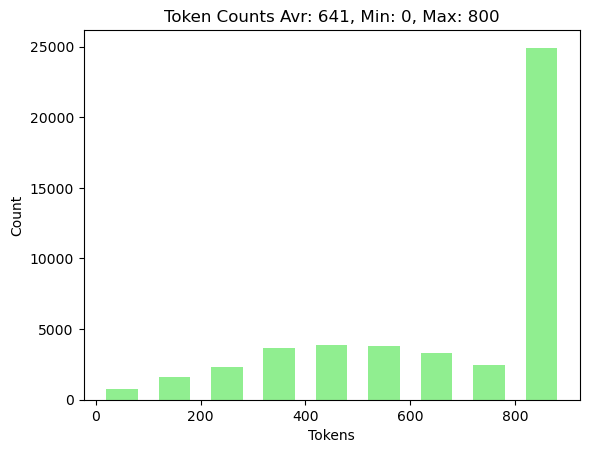

In [83]:
token_counts = [len(it.content) for it in all_items]

plt.title(f"Token Counts Avr: {sum(token_counts)/len(token_counts):,.0f}, Min: {min(token_counts)}, Max: {max(token_counts)}")
plt.xlabel("Tokens")
plt.ylabel("Count")
plt.hist(token_counts, rwidth=0.6, color='lightgreen', bins=range(0, 1000, 100))
plt.show()

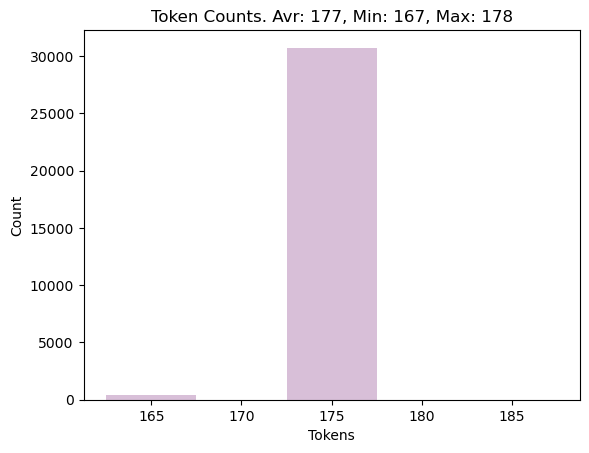

In [92]:
token_counts = [it.token_count for it in items]

plt.title(f"Token Counts. Avr: {sum(token_counts)/len(token_counts):,.0f}, Min: {min(token_counts)}, Max: {max(token_counts)}")
plt.xlabel("Tokens")
plt.ylabel("Count")
plt.hist(token_counts, rwidth=0.5, color='thistle', bins=range(160, 200, 10))
plt.show()

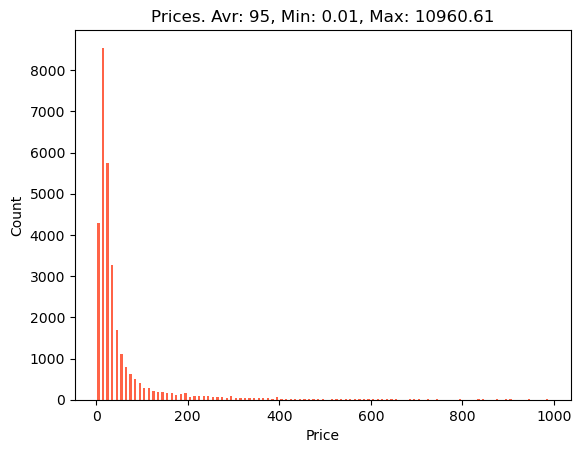

In [94]:
prices = [it.price for it in items]

plt.title(f"Prices. Avr: {sum(prices)/len(prices):,.0f}, Min: {min(prices)}, Max: {max(prices)}")
plt.xlabel("Price")
plt.ylabel("Count")
plt.hist(prices, rwidth=0.5, color='tomato', bins=range(0, 1000, 10))
plt.show()